## Observations and Insights 

In [106]:
# Dependencies and Setup
#%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)


study_results_df = pd.read_csv(study_results_path)

mouse_metadata_df
study_results_df

# Combine the data into a single dataset

outer_merged = pd.merge(mouse_metadata_df, study_results_df, how="outer", on=["Mouse ID"])
outer_merged


# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [107]:
# Check the number of mice.
number_mice= outer_merged.groupby(by='Mouse ID').agg('count')
#number_mice
count_mice = len(number_mice)
count_mice

249

In [108]:
# Find any duplicate rows with the same Mouse ID's and Timepoints. 


#test_dup = outer_merged.duplicated(['Mouse ID', 'Timepoint'], keep='first')
#test_dup

# find duplicated rows
duplicateRowsDF = outer_merged[outer_merged.duplicated(['Mouse ID', 'Timepoint'])]
duplicateRowsDF

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [109]:
# Drop any duplicate rows
#new_df = outer_merged.drop([duplicateRowsDF])
#new_df
new_df=outer_merged.drop_duplicates(['Mouse ID', 'Timepoint'])
new_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Recheck the number of mice
# Check the number of mice.
new_df_number_mice= new_df.groupby(by='Mouse ID').agg('count')
#number_mice
count_mice = len(new_df_number_mice)
count_mice

249

## Summary Statistics

In [111]:
# Generate a summary statistics table of mean, median, variance, 
# standard deviation, and SEM of the tumor volume for each regimen.


group_regimen = new_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})
group_regimen

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

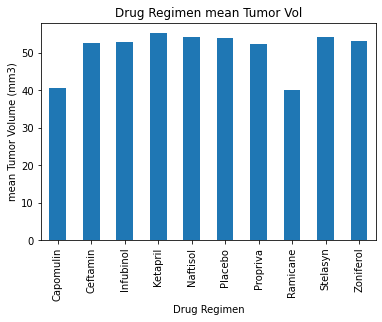

In [112]:
# Generate a bar plot showing the total number of datapoints for each drug regimen using pandas.
# There should be a single bar per regimen



group_regimen.columns = [ "Tumor Vol. mean", "Tumor Vol. median", "Tumor Volume var","Tumor Vol.std", "Tumor Vol. sem"] 
new_group = group_regimen["Tumor Vol. mean"]



new_group.plot(kind="bar" )
plt.ylabel("mean Tumor Volume (mm3)")
plt.title("Drug Regimen mean Tumor Vol")
plt.show()



Text(0, 0.5, 'Tumor Vol. mean')

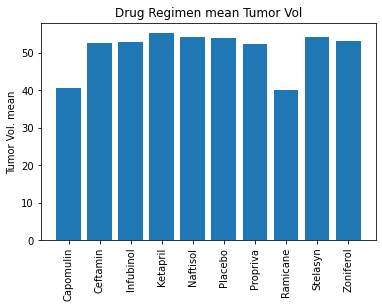

In [113]:
# General identical bar plot using pyplot instead of pandas.

#new_group_regimen = group_regimen.reset_index()

ng= new_group.reset_index()
ng
x_axis= np.arange(len(ng))

tick_locations = [value for value in x_axis]
mean_tumor = plt.bar(x_axis, ng["Tumor Vol. mean"])

plt.xticks(tick_locations, ng["Drug Regimen"], rotation="vertical" )
#plt.xticks(tick_locations, index=ng["Tumor Vol. mean"], rotation="vertical" )
plt.title("Drug Regimen mean Tumor Vol")
plt.ylabel("Tumor Vol. mean")




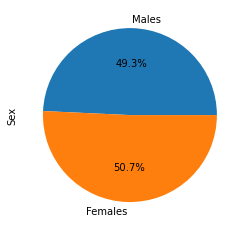

In [114]:
# Generate a pie plot showing the distribution of female versus male mice using pandas


labels =["Males", "Females"]
#amounts= [gnder_df.loc["Male"], gnder_df.loc["Female"]]

gender_df= new_df.groupby("Sex")
count_gender = gender_df["Sex"].count()

#explode=(.2, 0) --doesnt work with 2 variables. 
count_gender.plot(kind="pie", labels=labels, autopct='%1.1f%%')





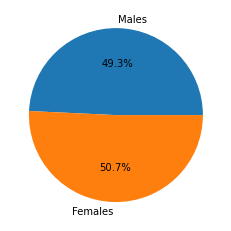

In [115]:
# Generate identical pie plot using pyplot
plt.pie(count_gender, labels=labels, autopct='%1.1f%%')
plt.show()


## Quartiles, Outliers and Boxplots

In [124]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
new_df.rename(columns = {'Drug Regimen':'Drug_Regimen'}, inplace = True) 
new_df

df_four = new_df.loc[(new_df.Drug_Regimen == 'Ramicane') | (new_df.Drug_Regimen == 'Capomulin') | (new_df.Drug_Regimen == 'Infubinol') | (new_df.Drug_Regimen == 'Ceftamin')]
df_four

df_four_gb = df_four.groupby(["Drug_Regimen","Mouse ID"])['Tumor Volume (mm3)'].max().to_frame()


# HINT: Not all mice lived until timepoint 45
# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


C:\Users\brega\anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,Drug_Regimen,Mouse ID,Tumor Volume (mm3)
0,Capomulin,b128,45.651331
1,Capomulin,b742,45.000000
2,Capomulin,f966,45.000000
3,Capomulin,g288,46.304003
4,Capomulin,g316,46.809225
...,...,...,...
95,Ramicane,s508,45.000000
96,Ramicane,u196,47.622816
97,Ramicane,w678,45.000000
98,Ramicane,y449,46.378092


Calculate the quartiles and IQR and quantitatively determine if there are any potential outliers across all four treatment regimens.

In [117]:
# Calculate quartiles, IQR, and identify potential outliers for each regimen.

# One method to do this is the following, but you can use whatever method works for you.

##############################################################################
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
df_four_gb1_capomulin =df_four_gb1.loc[df_four_gb1['Drug_Regimen'] == 'Capomulin']  
df_four_gb1_ramicane =df_four_gb1.loc[df_four_gb1['Drug_Regimen'] == 'Ramicane']  
df_four_gb1_infubinol =df_four_gb1.loc[df_four_gb1['Drug_Regimen'] == 'Infubinol']      
df_four_gb1_ceftamin =df_four_gb1.loc[df_four_gb1['Drug_Regimen'] == 'Ceftamin'] 



print("-----------------------------------------")
print("Restults for capomulin")
quartiles = df_four_gb1_capomulin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq


print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for capomulin.")
print(f"Values above {upper_bound} could be outliers for capomulin.")  


print("-----------------------------------------")
print("Restults for ramicane")
quartiles = df_four_gb1_ramicane['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for ramicane.")
print(f"Values above {upper_bound} could be outliers for ramicane.")  


print("-----------------------------------------")
print("Restults for infubinol")
quartiles = df_four_gb1_infubinol['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for infubinol.")
print(f"Values above {upper_bound} could be outliers for infubinol.")  

print("-----------------------------------------")
print("Restults for ceftamin")
quartiles = df_four_gb1_ceftamin['Tumor Volume (mm3)'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers for ceftamin.")
print(f"Values above {upper_bound} could be outliers for ceftamin.")  





-----------------------------------------
Restults for capomulin
The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 46.74900552
The interquartile range of occupancy is: 1.7490055199999972
The the median of occupancy is: 45.89372032 
Values below 42.376491720000004 could be outliers for capomulin.
Values above 49.37251379999999 could be outliers for capomulin.
-----------------------------------------
Restults for ramicane
The lower quartile of occupancy is: 45.0
The upper quartile of occupancy is: 46.34383237
The interquartile range of occupancy is: 1.3438323700000012
The the median of occupancy is: 45.52187471 
Values below 42.984251445 could be outliers for ramicane.
Values above 48.359580925 could be outliers for ramicane.
-----------------------------------------
Restults for infubinol
The lower quartile of occupancy is: 54.04860769
The upper quartile of occupancy is: 65.52574285
The interquartile range of occupancy is: 11.477135160000003
The the median of

In [118]:
d1 = df_four_gb1_capomulin['Tumor Volume (mm3)']
d2 = df_four_gb1_ramicane['Tumor Volume (mm3)']
d3 = df_four_gb1_infubinol['Tumor Volume (mm3)']
d4 = df_four_gb1_ceftamin['Tumor Volume (mm3)']

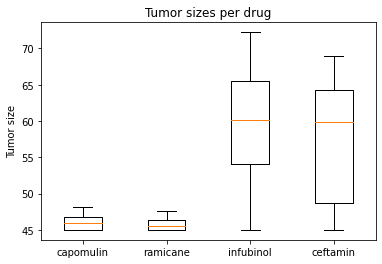

In [119]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
# There should be a single chart with four box plots inside it.



data = [d1,d2,d3,d4]


#data = [data, d2, d2[::2]]
fig, ax = plt.subplots()
ax.set_title('Tumor sizes per drug')
ax.set_ylabel('Tumor size')
ax.boxplot(data)


ax.set_xticklabels(['capomulin','ramicane','infubinol','ceftamin'])

plt.show()                              

## Line and Scatter Plots

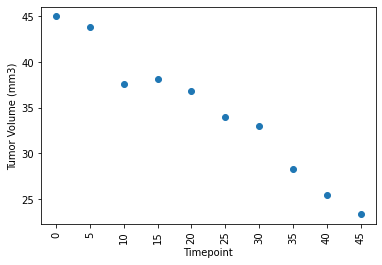

In [120]:
# Generate a line plot of tumor volume vs. time point for a single mouse 
# treated with Capomulin

singlemouse = df_four.loc[(df_four["Drug_Regimen"]=='Capomulin') & (df_four['Mouse ID']=='s185') ]
singlemouse
sm_tv = singlemouse["Tumor Volume (mm3)"]
sm_tp = singlemouse["Timepoint"]

plt.scatter(sm_tp, sm_tv)
plt.xticks(sm_tp, rotation=90)
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.show()


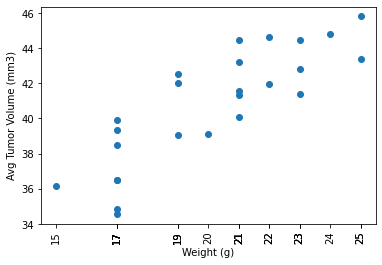

In [157]:
# Generate a scatter plot of average tumor volume vs. mouse weight 
# for all mice in the Capomulin regimen

df_capomulin = df_four.loc[df_four["Drug_Regimen"]=='Capomulin']


new_df = df_capomulin.groupby(["Mouse ID","Weight (g)"]).agg({"Tumor Volume (mm3)": ["mean"]}).reset_index()
new_df                                               

new_df.columns = ["Mouse ID","Weight (g)", "Avg Tumor Volume (mm3)"]   #new_df
new_df

                                                                                   
w = new_df["Weight (g)"]
avg_tv = new_df["Avg Tumor Volume (mm3)"]

plt.scatter(w, avg_tv)
plt.xticks(w, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

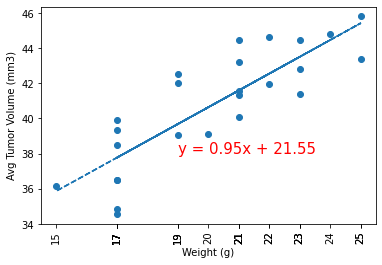

The correlation coefficient between average Weight (g) and 'Avg Tumor Volume (mm3)' is 0.84


In [163]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen



aa_slope, aa_int, aa_r, aa_p, aa_std_err = st.linregress(
    w, avg_tv)
aa_fit = aa_slope * w + aa_int
plt.scatter(w,avg_tv)
plt.plot(w,aa_fit,"--")
plt.xticks(w, rotation=90)

line_eq = "y = " + str(round(aa_slope,2)) + "x + " + str(round(aa_int,2))
plt.annotate(line_eq,(19,38), fontsize=15,color="red") #prints on grpah the line regression model
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3)')
plt.show()
print(f"The correlation coefficient between average Weight (g) and 'Avg Tumor Volume (mm3)' is {round(st.pearsonr(w,avg_tv)[0],2)}")

# Observations and Insights